### 인공신경망

#### 1. 인공신경망의 개요

1. 개요

* 인공지능의 한 분야
* 사람의 두뇌의 생물학적 작동형태를 모방하여 컴퓨터로 하여금 지적능력을 갖추게하는 방법론

2. 분류방법
* 선형분류와 비선형 분류회귀분석은 선형적인 분류방법이지만 비선형적인 자료를 분석하기 위해서는 선형적인 방법으로 분석하기 힘들기 때문에 비선형적인 즉, 인공신경망을 통한 분석방법이 필요하게 되었다.

3. 인공신경망의 구조
>* 3개의 층(Three Layer Network)
* 입력층(Input Layer) : 자료가 입력
* 은익층(Hidden Layer) : 입력된 자료에 가중치 등을 주어서 계산
* 출력층(output Layer) : 출력층에서 결과를 확인
* 딥러닝(Deep Learning)은 은닉층의 갯수를 많이 늘려서 계산을 한다.

#### 2. 기본개념

1. 처리요소(PE)
* 각각의 인자(Neuron을 의미)
* 노드(Node) 또는 유니트(Unit)라고 한다.

2. 층(Layer)

* 보통 3개의 층(Three-Layer)
* 은닉층(Hidden) : 입력값과 출력값을 연결 시켜주는데 매개변수값으로 채워지게 되는데 전체 신경망의 성공여부가 은닉층에 달려있다.

3. 가중치(Weight)

* 1번째 PE와 J번째 PE와의 연결 결합정도
* Wij : 층과 층ㄱ사이의 연결이 i에서 j로 갈때의 연결강도

#### 3. 다중퍼셉트론

1. 입력층과 출력층사이의 중간층 즉, 은닉층이 존재하는 신경망
1. 다중퍼셉트론에서의 가중치(Weight)
   * 지속적으로 전체 신경망이 만족할 만한 목표에 도달할 때까지 변함
     - 목표값이 도달할 때가 지속적으로 계산하기 때문에 계산량이 아주 많음
   * 계산된 출력값과 목표출력값(Target Output)을 비교하여 그 차이(오차함수)를 최소화 시킬 수 있도록 지속적으로 조정이 된다.
   * 학습방법 : 역전파 알고리즘(Backpropagation Algorithm)
     - 입력층의 각 유닛에 입력패턴 입력
     - 입력신호는 각 유닛에서 변환되어 중간층(은닉층)에 전달되고 최후에는 출력층에서 신호를 출력
     - 이 출력값과 기대값(목표값)을 비교하여 차이를 줄여나가는 방향으로 연결강도를 조절
     - 상위층에서 역전파하여 하위층에서는 다시 자기층의 연결강도(가중치)를 조정
     
#### 4. 인공신경망의 추론과정

1. 1단계 : 초기 연결가중치를 결정 : 연결가중치를 임의의 아주 작은 값(보통 -1~1)으로 초기화  
1. 2단계 : 전방향계산
   * 은닉층 및 출력층에서 입력값에 연결 가중치를 곱하여 각 처리요소(PE)들의 출력값을 계산
   * 전이함수를 사용하여 출력값을 결정
1. 3단계 : 역방향 계산
   * 출력층의 출력값 목표출력값 사이의 오류치 계산
   * 출력층과 은닉층 사이의 연결 가중치를 수정
   * 은닉층과 입력층 사이의 연결 가중치를 수정
1. 4단계 : Epoch(2,3단계)의 반복

#### 5. 인공신경망의 학습절차

1. 1단계 : 자료수집 - 정확하고 충분한 자료의 수집이 필요(최소 1000건이상 필요)
1. 2단계 : 자료준비
   * 비계량화자료를 계량화
   * Outlier를 제거
   * 학습용자료와 검증용자료를 정의(training, test, validateion set)
   * 데이터전처리과정
1. 3단계 : 신경망의 구조와 학습모수의 결정
   * 은닉층의 수와 은닉노드의 수를 결정
   * 학습틀, 학습중지점등을 결정
1. 4단계 : 학습과 검증
   * 검증방법의 결정
   * 검증결과의 해석

<img src="./images/28.머신러닝_지도학습_4_인공신경망_01.png" width="500" height="400">
<img src="./images/28.머신러닝_지도학습_4_인공신경망_02.png" width="500" height="400">

In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

import mglearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

##### 신경망(딥러닝)

신경망이라고 알려진 알고리즘들은 최근 `딥러닝 Deep Learning`이란 이름으로 주목받고 있다. 딥러닝은 많은 머신러닝 애플리케이션에 희망적인 성과를 보여주고 있지만 특정 분야에 정교하게 적용되어있을 때가 많다. 깊고 복잡한 딥러닝보다 비교적 간단하게 분륭하 회귀에 쓸 수 있는 `다층퍼셉트론 Multilayer Perceptron, MLP`를 사용하여 머신러닝을 적용한다. 다층퍼셉트론은 `기본 피드포워드 feed-forward`신경망 또는 간단히 신경망이라고 한다.

##### 신경망모델
MLP는 여러 단계를 거쳐 결정을 만들어 내는 선형모델의 일반화된 모습이라고 볼 수 있다.

In [ ]:
# 인공신경망그리기
# graphviz가 필요

# 시스템설정을 통한 패스등록이 아닌 파이썬 내부에서의 path설정
# import os
# os.environ['PATH'] += os.pathsep + 'c:/Program Fiels (x86)/Graphviz2.38/bin'

In [ ]:
# 입력특성과 예측은 노드(Node)로 결정계수는 노드 사이에 연결로 나타낸 로지스틱회귀
mglearn.plots.plot_logistic_regression_graph()

# 왼쪽 노드(x[0]~ x[3])은 입력특성 중간의 엣지(w[0] ~ w[3])까지는 가중치를 나타낸다.
# 마지막으로 오른쪽 노드(y)는 입력특성과 가중치의 곱들의 합으로 나온 결과물을 나타낸다.

MLP에서는 가중치 합을 만드는 과정이 여러번 반복되며 먼저 중간단계를 구성하는 `은닉유닛 hidden unit`를 계산하고 이를 이용하여 최종결과를 산출하기 위해 다시 가중치 합을 계산한다.

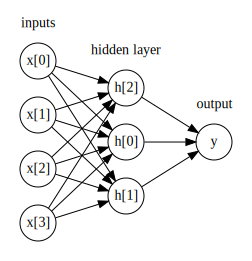

In [4]:
# 은닉층이 1개인 그래프
mglearn.plots.plot_single_hidden_layer_graph()

In [ ]:
# 활성화함수
# https://ko.wikipedia.org/wiki/%EC%8C%8D%EA%B3%A1%EC%84%A0_%ED%95%A8%EC%88%98
# 쌍곡선 함수 np.tanh
# tanh는 시그모이드 함수를 확장한 형태이다.
# 시그모이드 함수는 0 ~ 1까지의 숫자가 0과 1에 무한이 가까운 형태이지만
# tanh는 -1~1 사이의 숫자이다.
# relu는 0~ 1이상의 숫자

line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')
plt.title('활성화 함수')
plt.show()

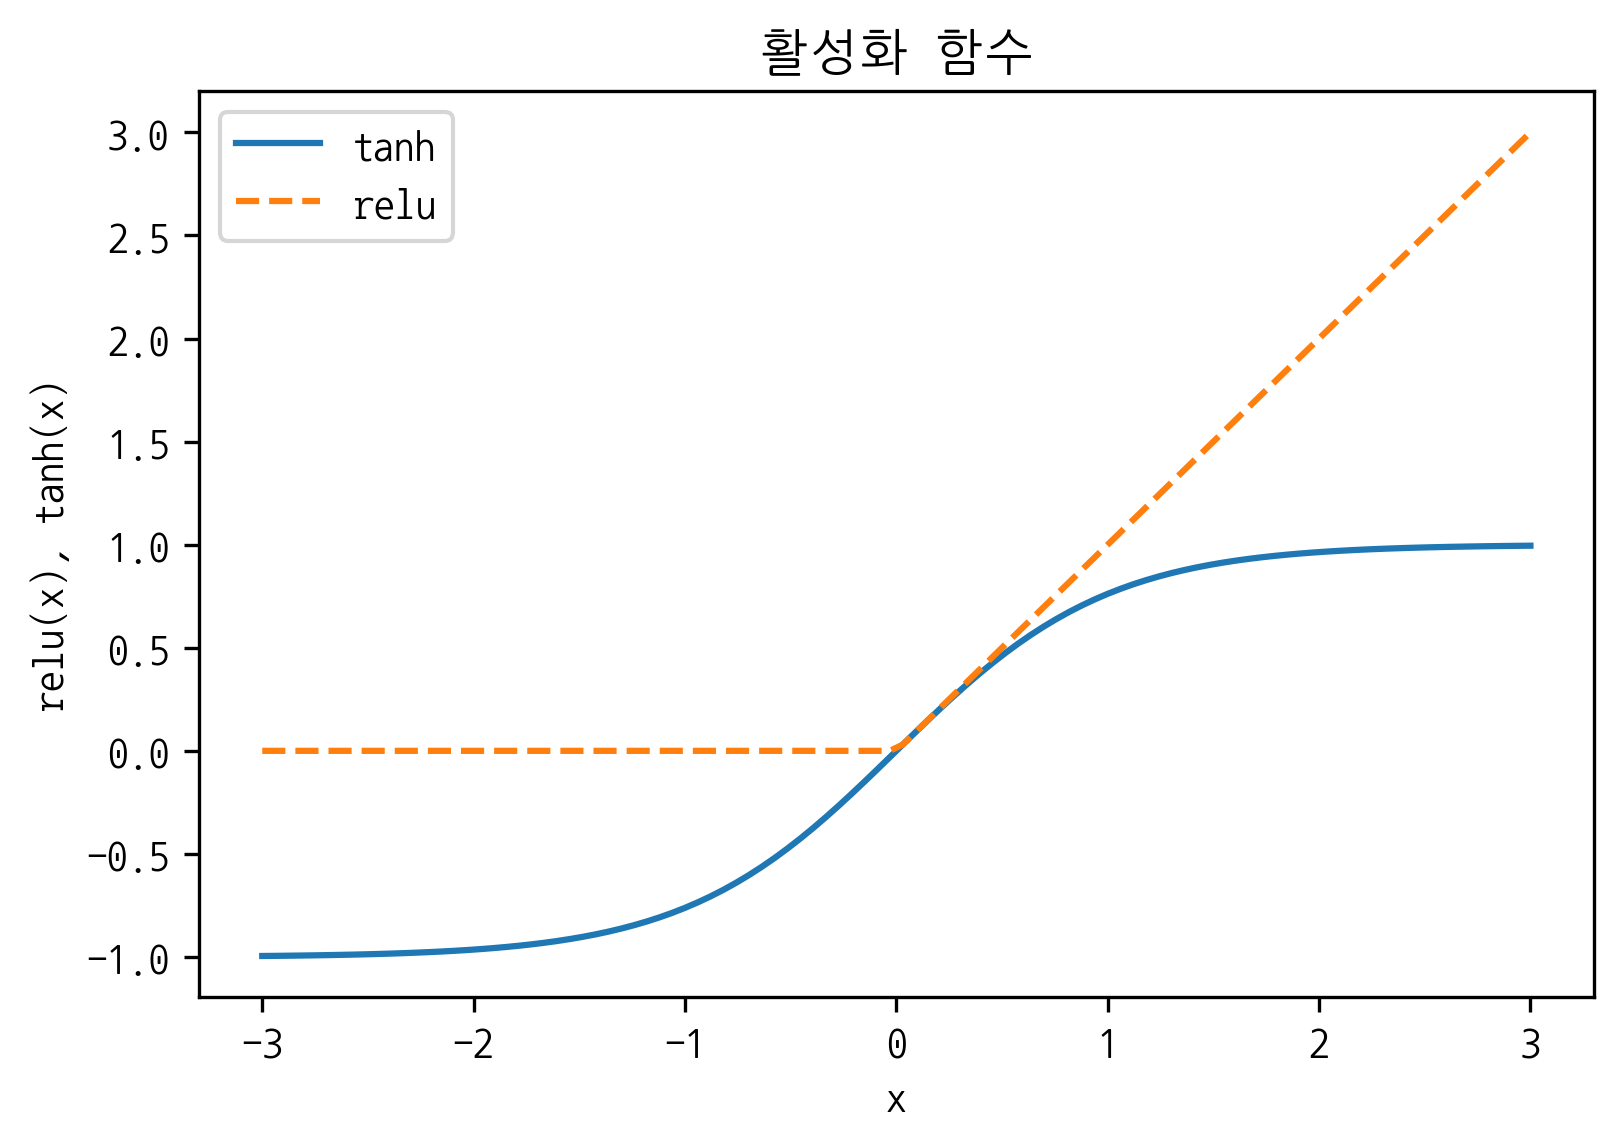

In [14]:
# 시그모이드 같은 경우에는 0~1 사이의 숫자로 타겟이 2개일 경우 유효하다고 볼 수 있다.
# 반면 iris데이터 같이 타겟이 2개보다 많을 경우에는 relu함수를 사용하는 것이 더 유효할 수 있다.
# -- 0~1 이상의 숫자가 나오기 때문에 변수에 맞는 범위를 늘리기 쉬운듯?

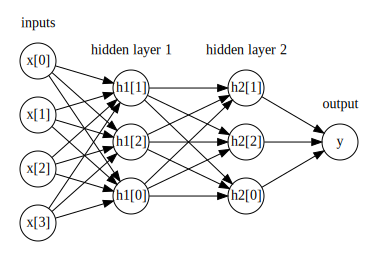

In [15]:
# 은닉층이 2개인 그래프
mglearn.plots.plot_two_hidden_layer_graph()

# 결과
# 소규모 데이터셋일 경우 10개 정도는 괜찮지만 복잡한 데이터셋에서 10000개 이상이 될 수도 
# 있다. 이와 같이 많은 은닉층으로 구성된 대규모의 신경망이 생기면서 이를 딥러닝이라고 부른다.


##### 실습 1. 신경망튜닝

Text(0.5, 1.0, 'MLPClassifier을 통해 구분, 은닉층 1개, 은닛유닛 100개인 신경망')

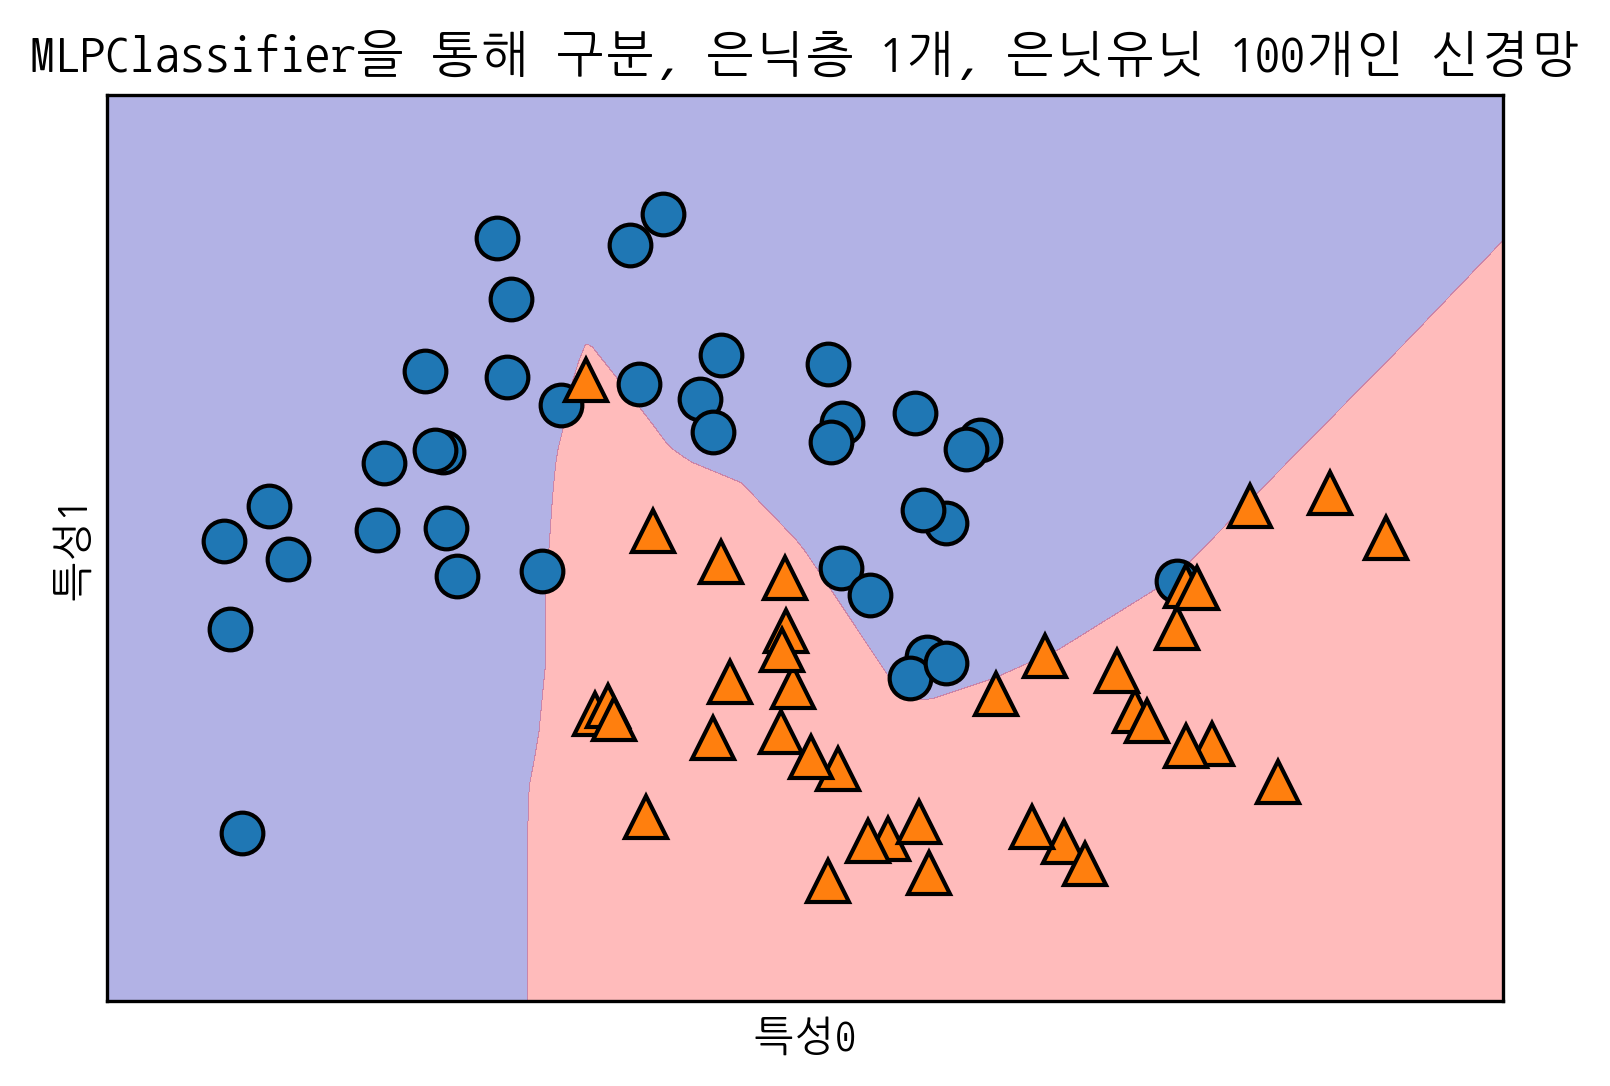

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 데이터셋
# stratify : 계층별 추출법으로 데이터를 호출
x ,y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=42)

# 산점도
mglearn.discrete_scatter(x_train[:,0], x_train[:,1],y_train)

# MLPClassifier : 멀티레이어 클래스 구분
# solver = 가중치 최적화 방법론 solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
# activation = 분류에 사용할 공식 {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
# 분류그래프이며 숫자의 범위가 차이가 있다는 정도만 알아두면 될듯

#  hidden_layer_sizes=(100,) 기본 은닉층 1, 은닛유닛 100
mlp = MLPClassifier(solver='lbfgs',activation='relu',random_state=0).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('MLPClassifier을 통해 구분, 은닉층 1개, 은닛유닛 100개인 신경망')
# 선으로 구분
#mglearn.plots.plot_2d_separator('')

Text(0.5, 1.0, 'MLPClassifier을 통해 구분, 은닉층 1개, 은닛유닛 10개인 신경망')

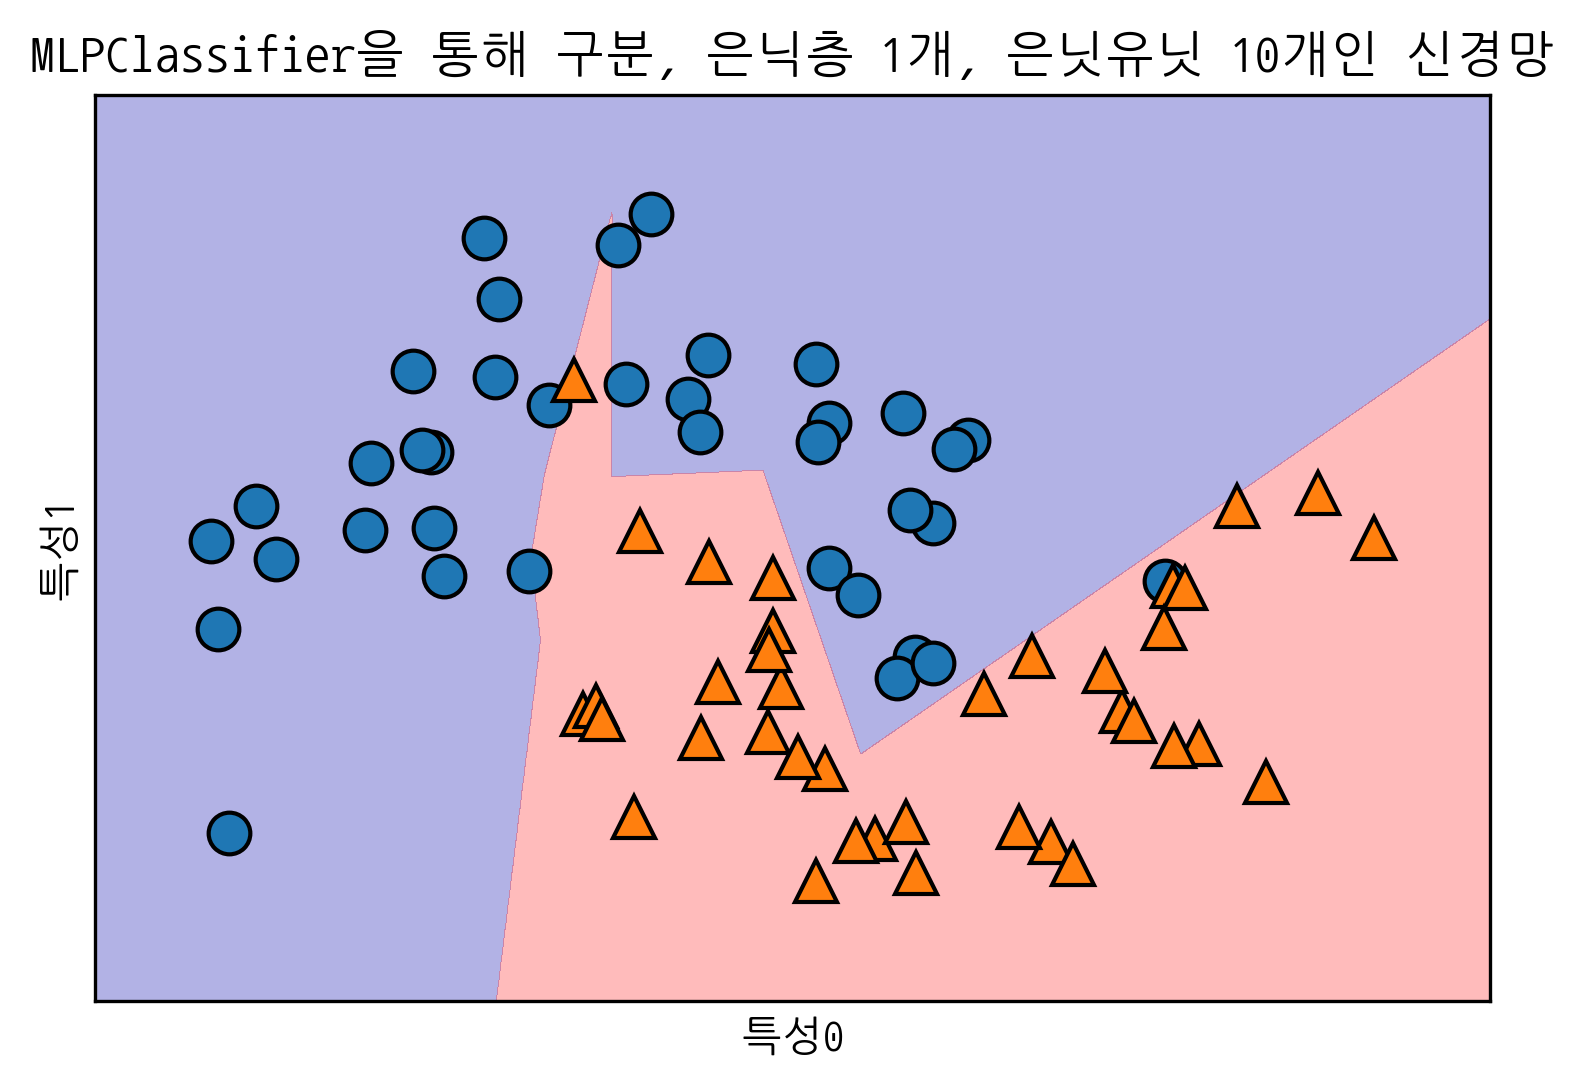

In [44]:
# 산점도
mglearn.discrete_scatter(x_train[:,0], x_train[:,1],y_train)

#  hidden_layer_sizes=(100,) 기본 은닉층 1, 은닛유닛 100
mlp = MLPClassifier(hidden_layer_sizes=[10,],solver='lbfgs',activation='relu',random_state=0).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('MLPClassifier을 통해 구분, 은닉층 1개, 은닛유닛 10개인 신경망')
# 선으로 구분
#mglearn.plots.plot_2d_separator('')

# 결과분석
# 은닉유닛이 10개이어서 결정경계가 100개보다 날카로워졌다. 비선형함수는 렐루이다.
# 은닉층이 하나이기 때문에 결정경계를 만드는 함수는 직성 10개가 합쳐져서 구성된다.
# 좀 더 매끄러운 경계를 원한다면 은닉유닛을 추가하거나 은닛 층을 추가, tanh를 상용하는 
# 방법이 있다.

Text(0.5, 1.0, 'MLPClassifier을 통해 구분, 은닉층 1개, 은닛유닛 10개인 신경망')

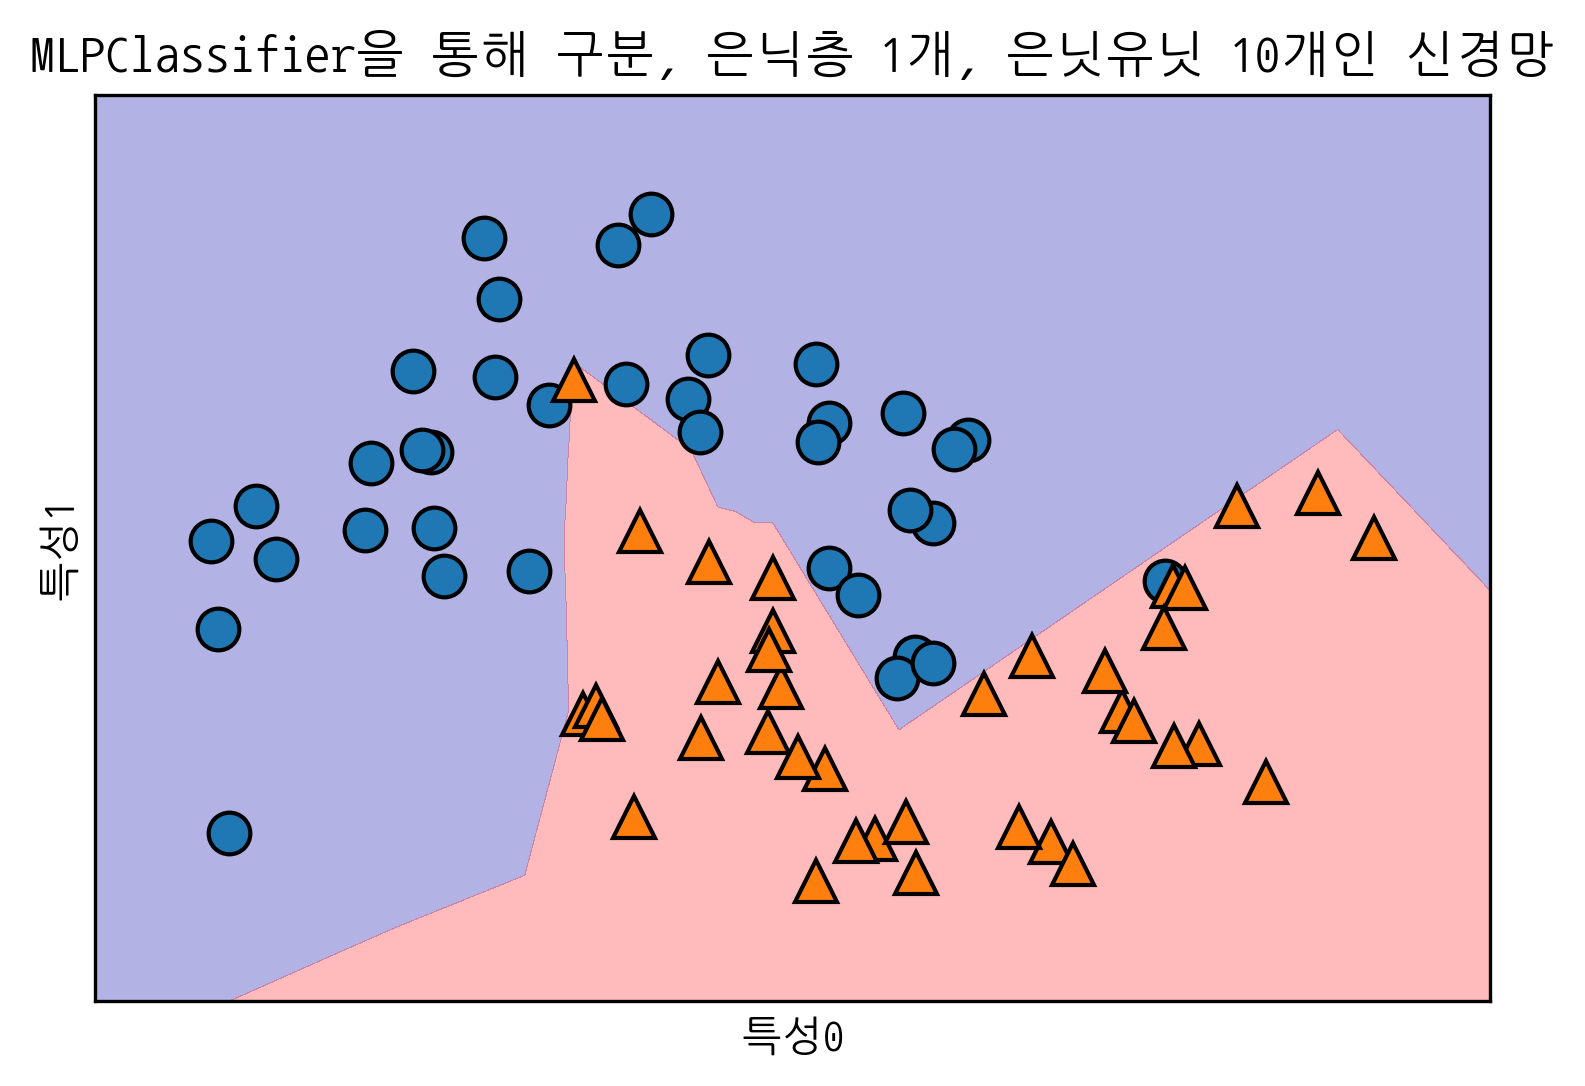

In [43]:
#
mglearn.discrete_scatter(x_train[:,0], x_train[:,1],y_train)

# 은닉층을 추가하려면 은닛유닛을 추가로 넣어주면 된다.
mlp = MLPClassifier(hidden_layer_sizes=[10,10],solver='lbfgs',activation='relu',random_state=0).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('MLPClassifier을 통해 구분, 은닉층 1개, 은닛유닛 10개인 신경망')
# 선으로 구분
#mglearn.plots.plot_2d_separator('')

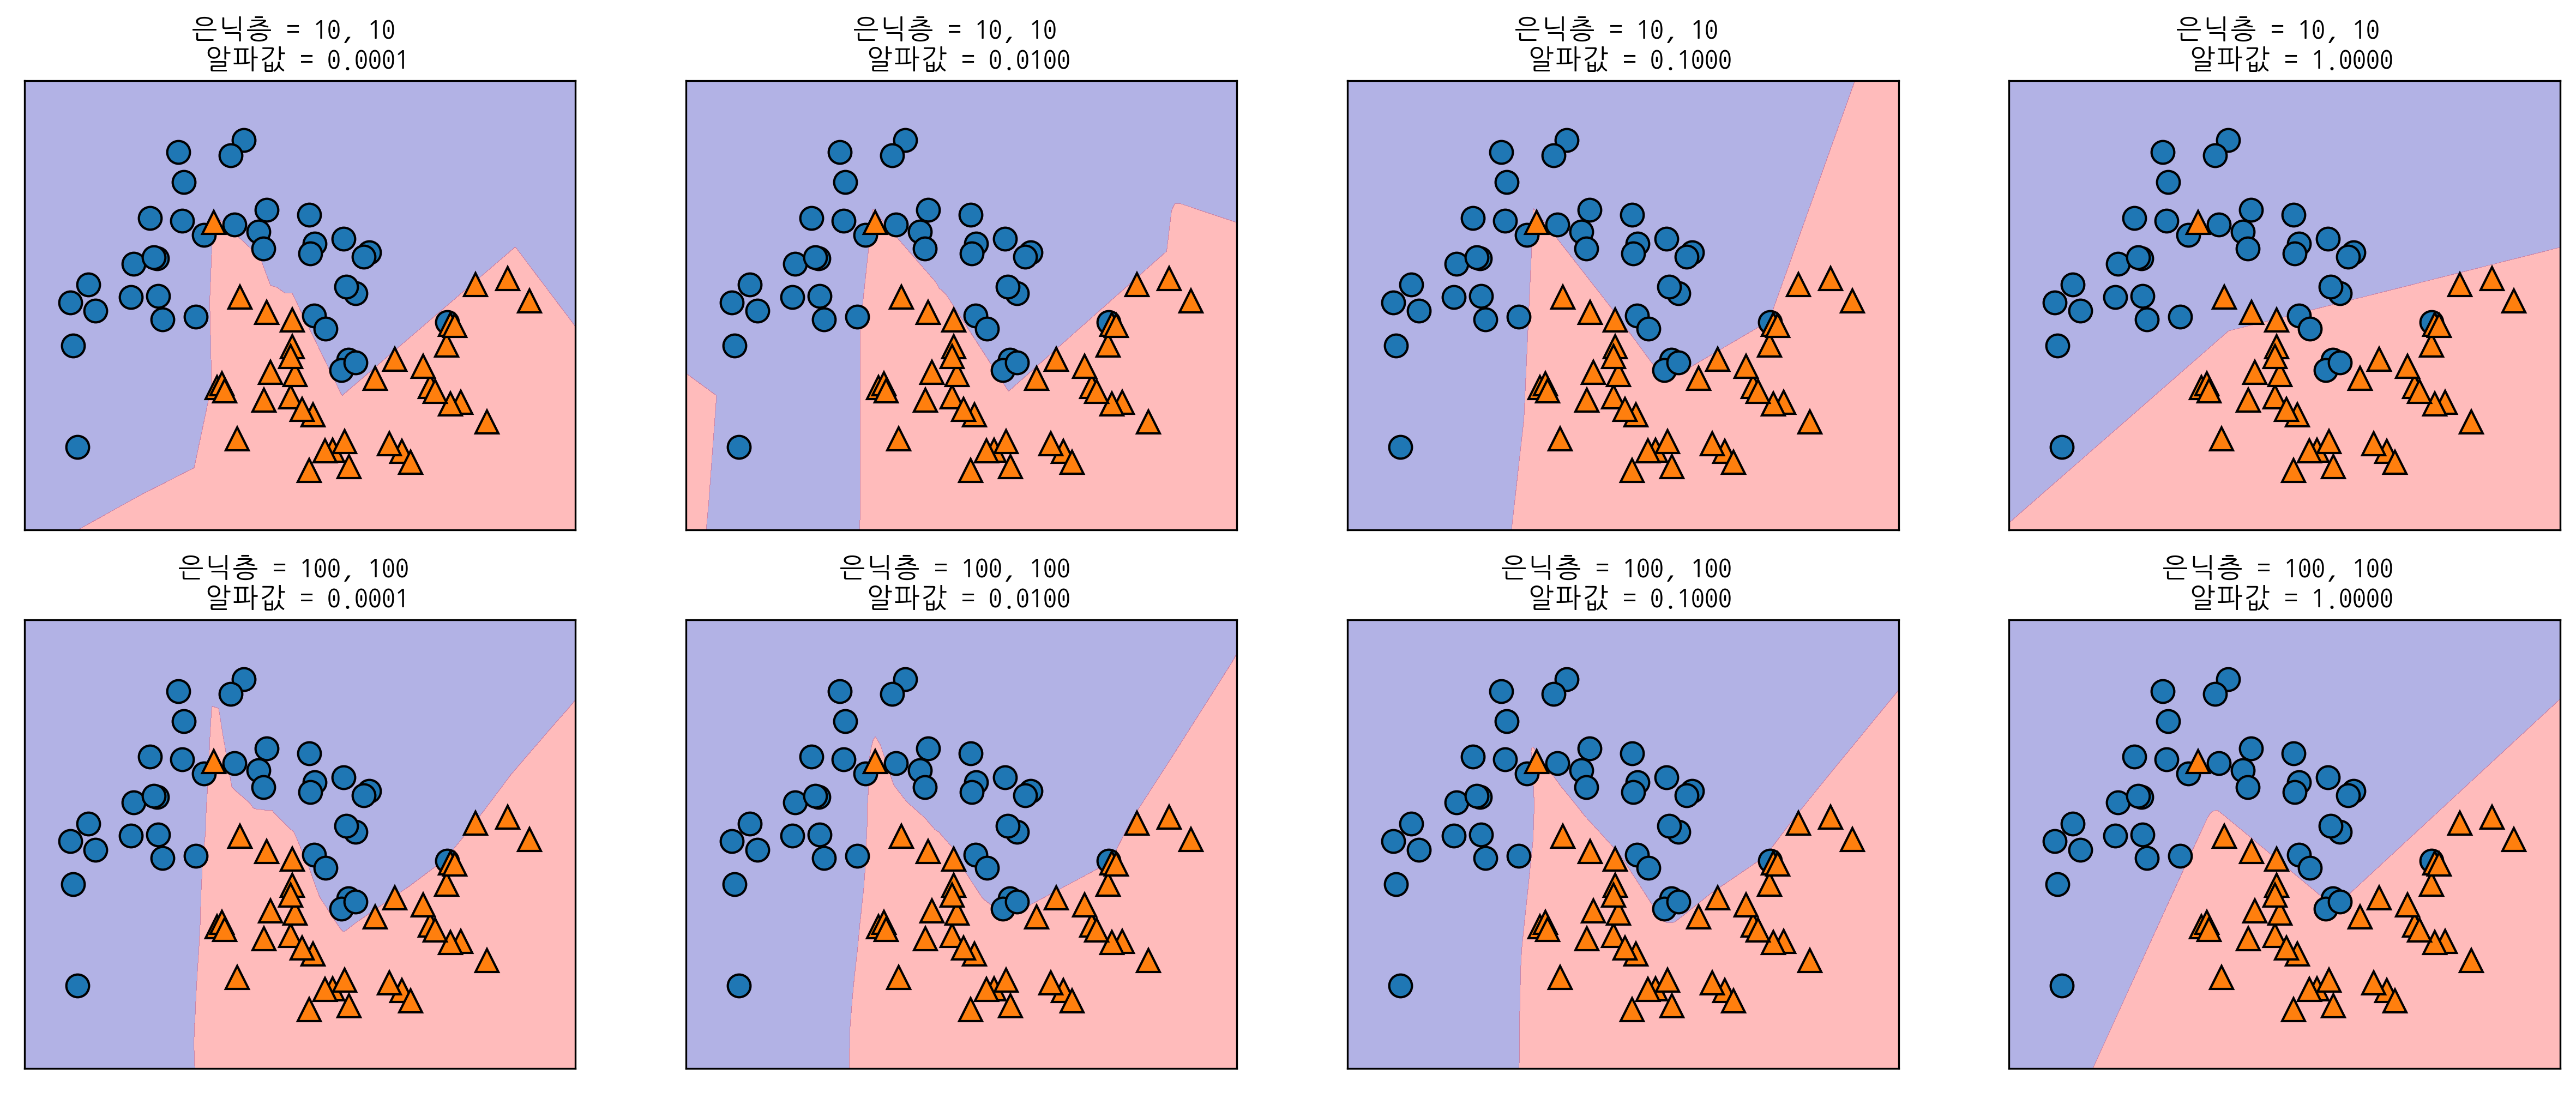

In [14]:
# 은닉층과 은닉유닛에 따른 결정경계
fig, axes = plt.subplots(2,4, figsize=(20,8))
x ,y = datasets.make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=42)

# 은닛유닛이 10개 100개인 그래프
# mlp에서는 규체 옵션이 alpha로 되어있음.
# alpha는 모델에서는 규제옵션, 그래프에서는 투명도라고 생각하면 될듯
# 신경망의 복잡도를 제어하는 방법은 은닉층의 수, 은닉유닛의 수, 규제를 사용한다.

for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha1 in zip(axx,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver ='lbfgs', random_state= 0,
                            ## 레이어 2층, 유닛 한층당 10
                           hidden_layer_sizes= [n_hidden_nodes, n_hidden_nodes],
                           alpha = alpha1 )
        mlp.fit(x_train, y_train)
        mglearn.discrete_scatter(x_train[:,0], x_train[:, 1], y_train, ax=ax)
        mglearn.plots.plot_2d_separator(mlp, x_train,ax=ax, fill= True, alpha = 0.3)
        ax.set_title('은닉층 = {}, {} \n 알파값 = {:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha1))


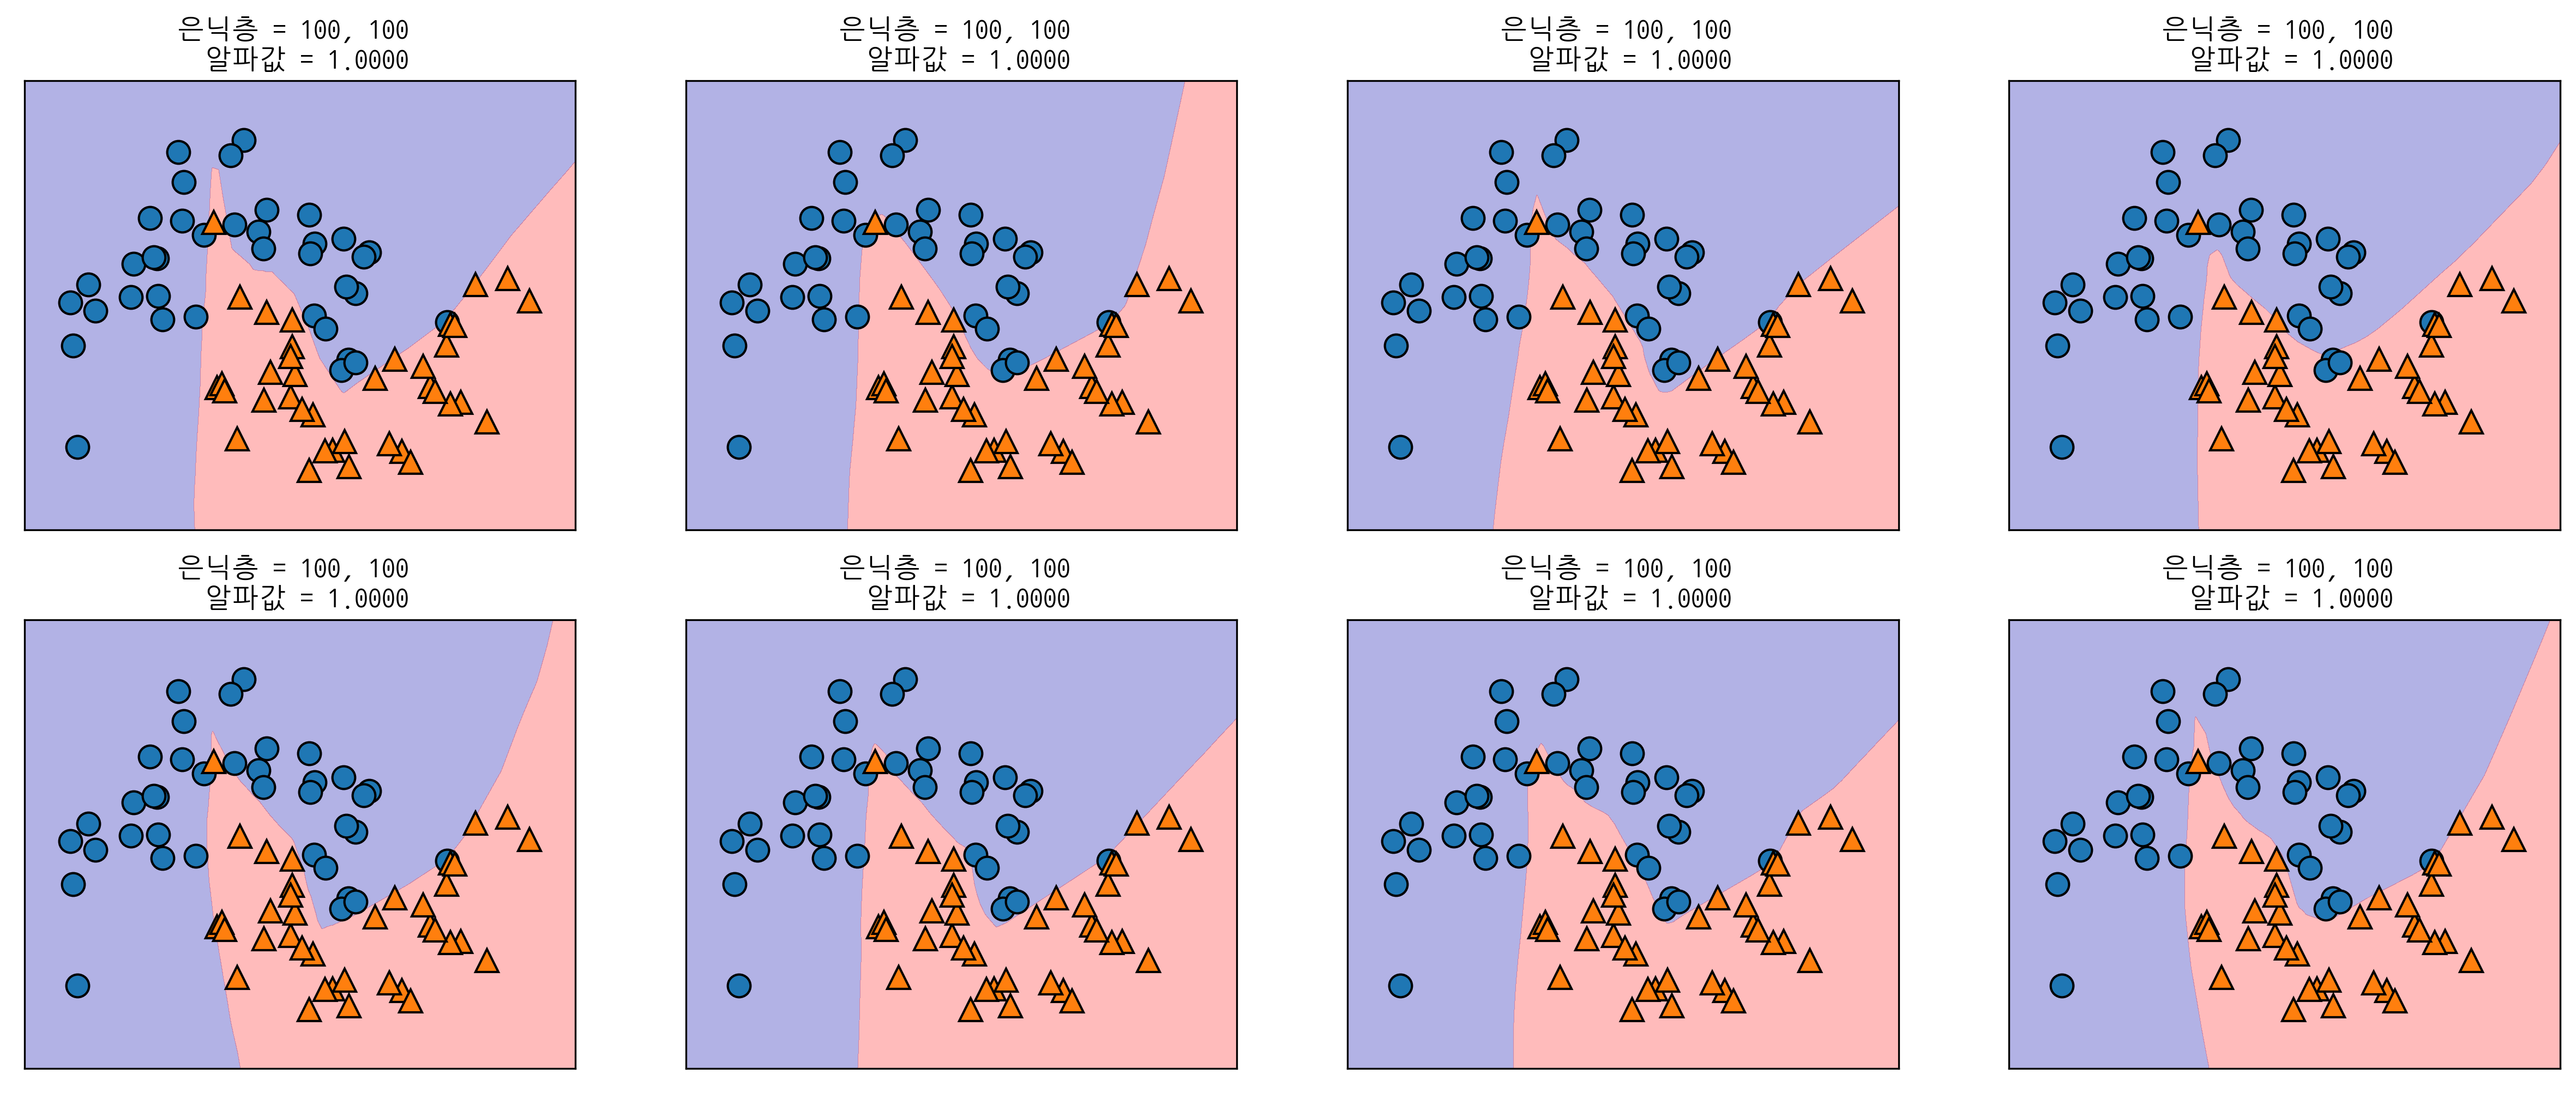

In [20]:
# 무작위로 서로 다른 초기값을 부여하고 동일 매개변수로 학습한 결정경계

# ravel <=> reshape
fig, axes = plt.subplots(2,4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()) :# axes.revel(): 2:4의 그래프를 1차원으로 치환
    mlp = MLPClassifier(solver ='lbfgs', random_state=i,
                        hidden_layer_sizes=[100,100]).fit(x_train, y_train)
    mglearn.discrete_scatter(x_train[:,0], x_train[:, 1], y_train, ax=ax)
    mglearn.plots.plot_2d_separator(mlp, x_train,ax=ax, fill= True, alpha = 0.3)
    ax.set_title('은닉층 = {}, {} \n 알파값 = {:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha1))


### 장단점과 매개변수

장점은 대량의 데이터에 내재된 정보를 찾아내고 매우 복잡한 모델을 만들 수 있다. 충분한 연산시간과 데이터를 주고 매개변수를 세심하게 조정하면 인공신경망은 다른 머신러닝 알고리즘보다 뛰어난 성능을 나타낸다.

단점은 인공신경망 (특히 크고 강력한 모델이거나 매개변수에 따라) 학습시간이 오래 걸린다. 또한 데이터 전처리에 주의해야 한다.

#### solver 매개변수

`solver`매개변수를 사용해 모델을 학습시키는 방법 또는 매개변수 학습에 사용하는 알고리즘을 사용자가 지정할 수 있다. `solver`매개변수에는 쉽게 사용할 수 있는 옵션 두가지가 있는데 기본값은 `adam`으로 대부분의 경우  잘 작동되지만 데이터의 스케일에 조금 민감하다. 그래서 데이터를 `평균 0, 분산1`로 조정하는 것이 중요하다.

다른 하나는 `lbfg`로 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸린다. 또 다른 알고리즘 많은 딥러닝 연구자가 사용하는 `sgd`가 있다. 이 옵션은 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있다.

#### 인공신경망 실습

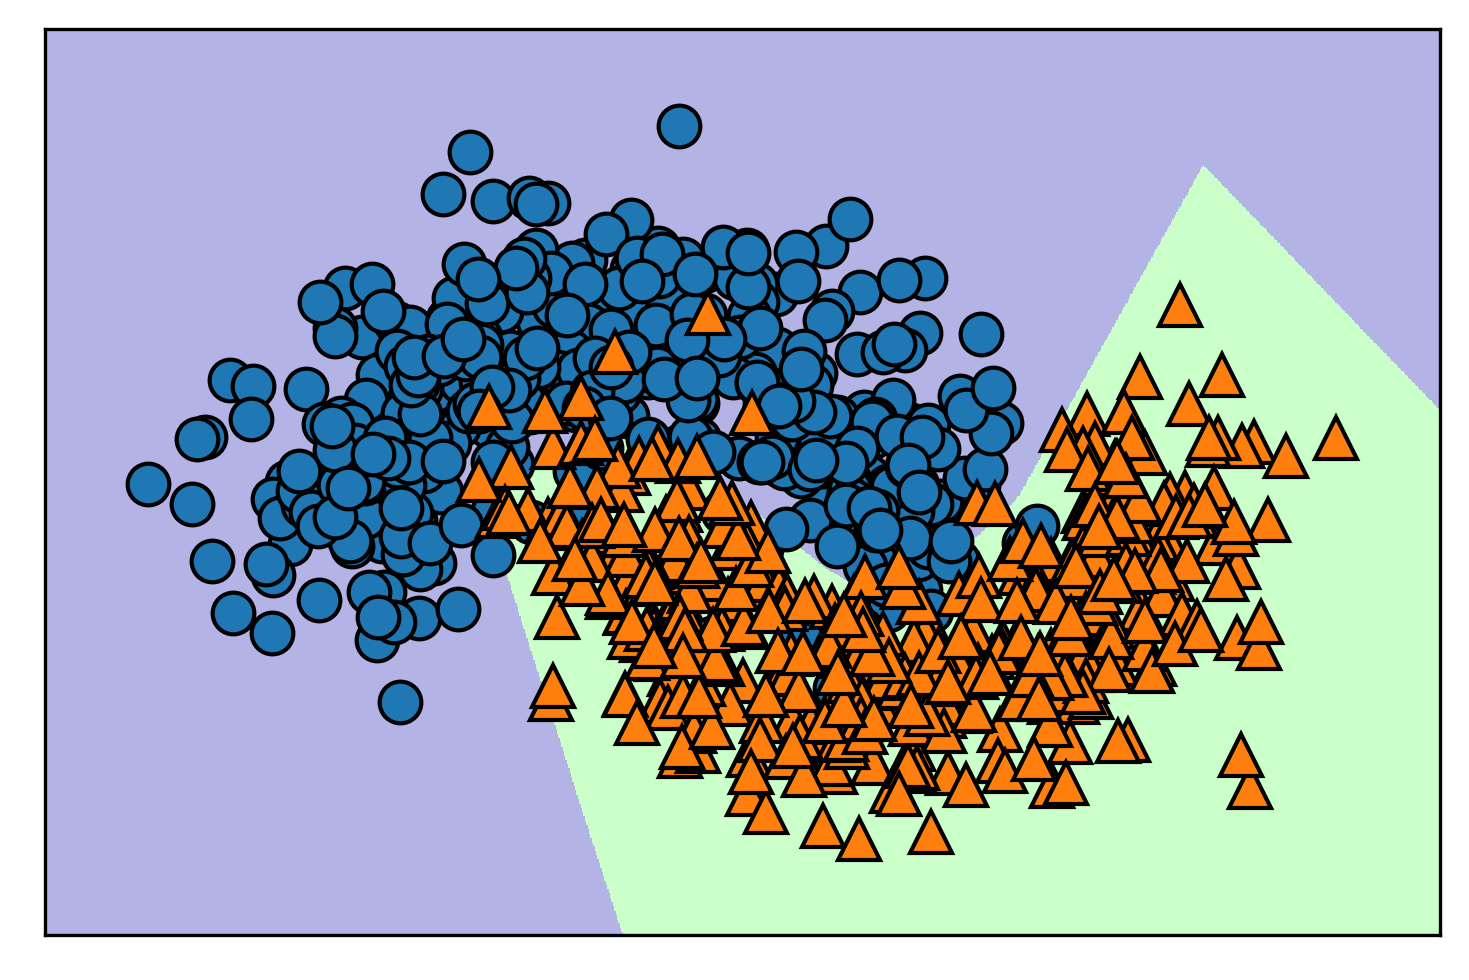

In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 데이터셋
# noise = 표준편차를 이용해서 분류가 안되는 데이터를 인의적으로 생성

x ,y = datasets.make_moons(n_samples=1000, noise=0.25, random_state=3)

# test_size = 전체 데이터에서 테스트 데이터를 추출하는 비율 8:2
# stratify = y 훈련, 테스트 데이터를 추출할 시 계층별선별법으로 데이터를 추출
# -> 각각의 타겟값들이 동일한 비율로 나타남 -계층 1, 계층 0 -> 같은 비율로 추출


x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,
                                                    random_state=42,test_size=0.2)

mlp = MLPClassifier(solver ='lbfgs', random_state= 0,hidden_layer_sizes=[10,10]).fit(x_train, y_train)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
mglearn.plots.plot_2d_classification(mlp, x_train, fill= True, alpha= 0.3)
plt.show()

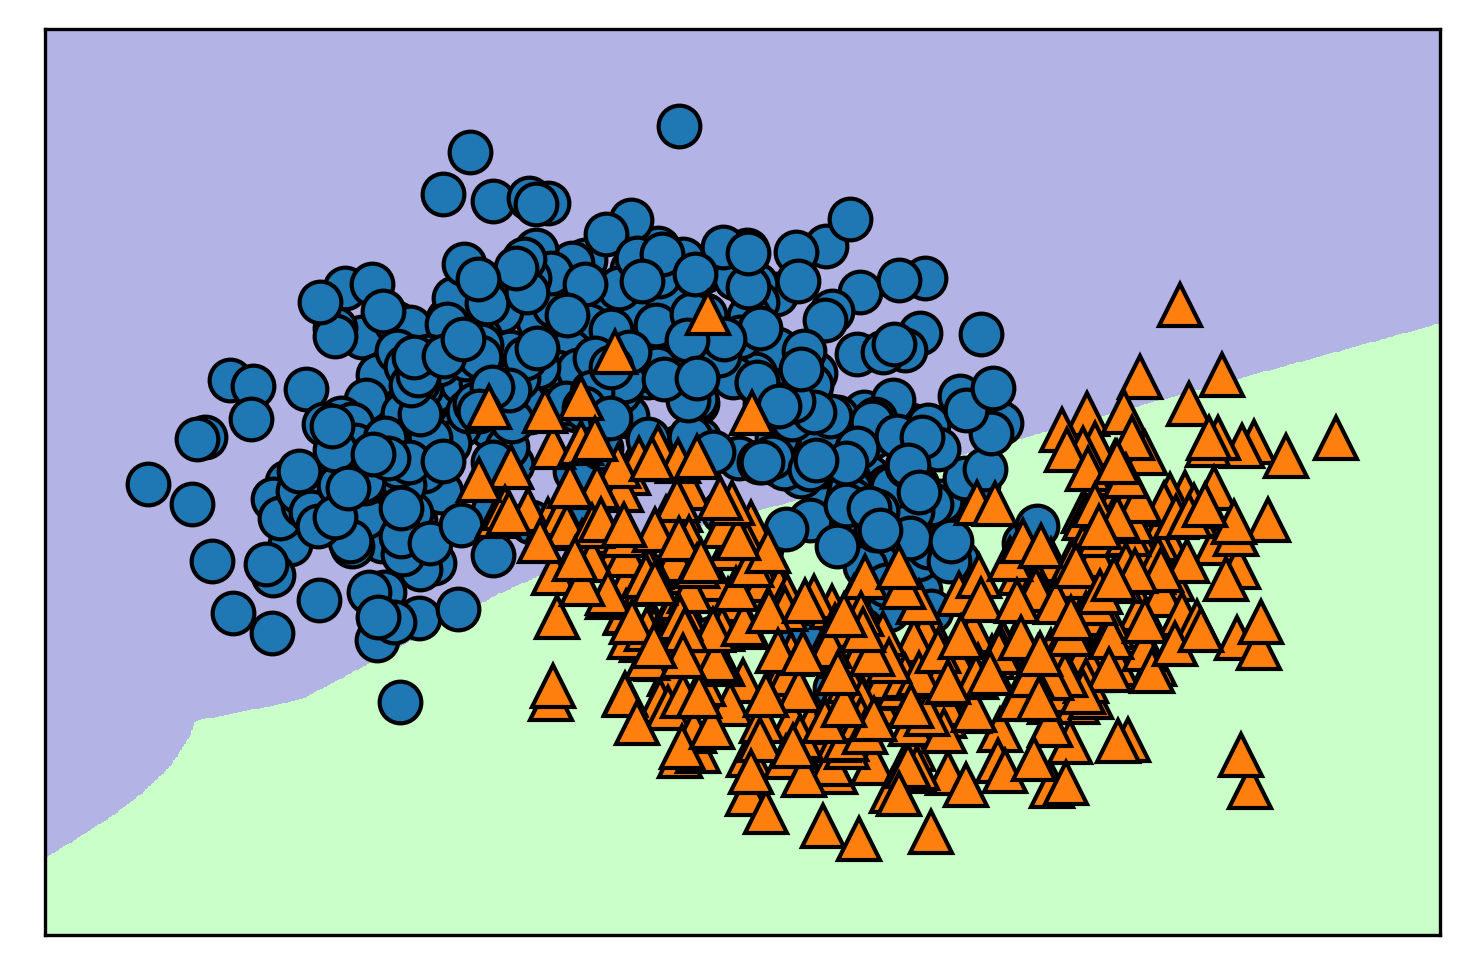

In [32]:
mlp = MLPClassifier(solver ='sgd', random_state= 0,hidden_layer_sizes=[10,10]).fit(x_train, y_train)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
mglearn.plots.plot_2d_classification(mlp, x_train, fill= True, alpha= 0.3)
plt.show()

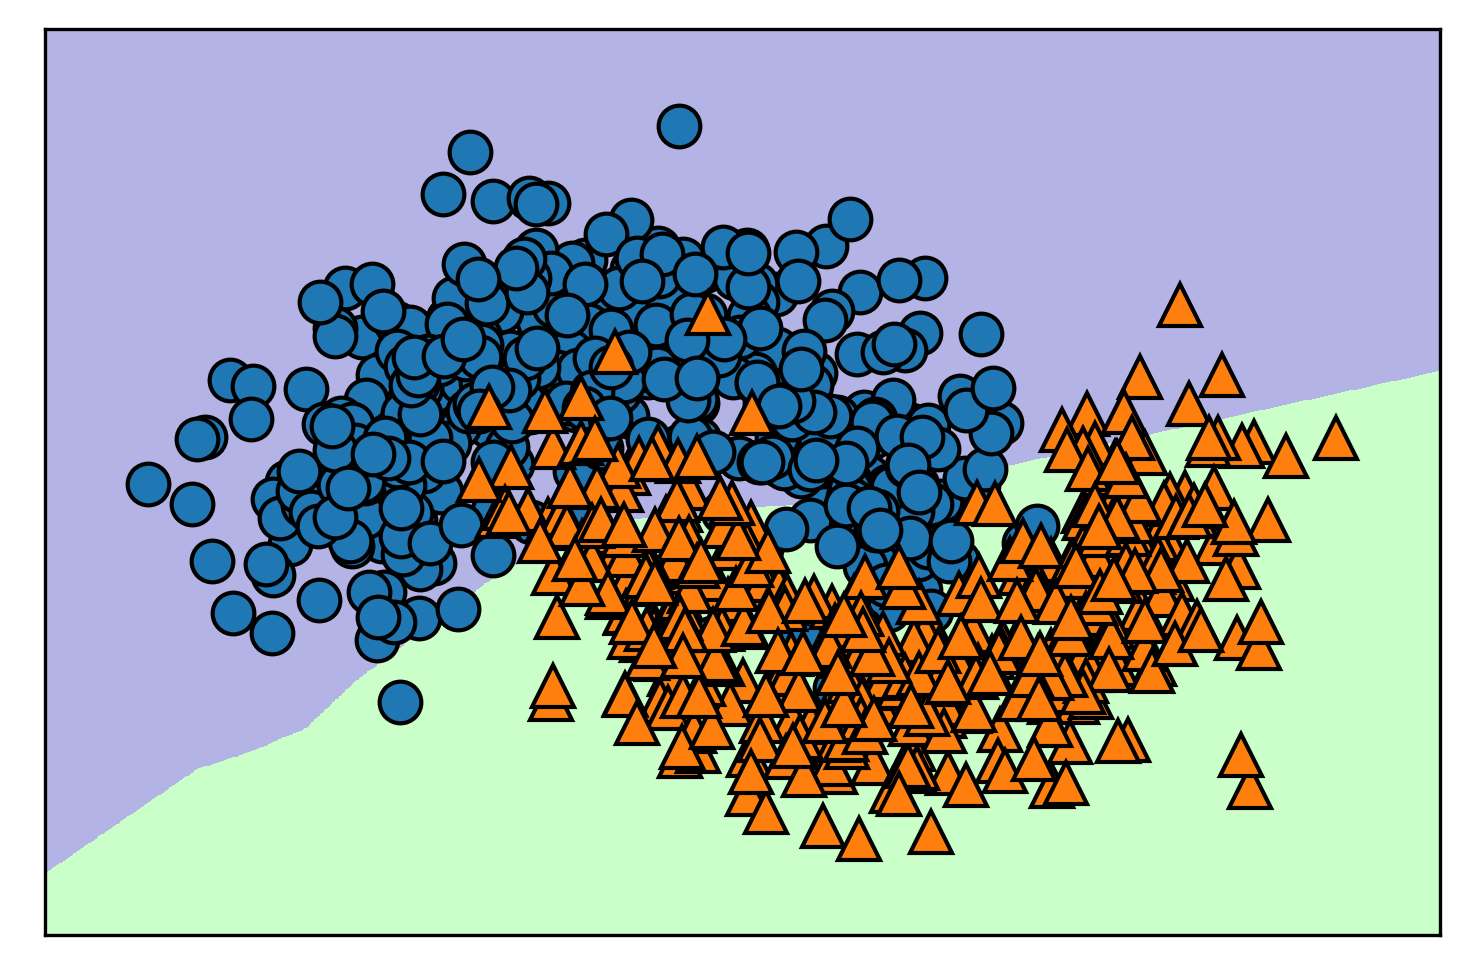

In [33]:
# 연습
# 히든층 2개, 유닛 10개씩
# 최적 알고리즘 변경 adam, sgd, lbffs
# 기계학습 후 그래프 시각화
mlp = MLPClassifier(solver ='adam', random_state= 0,hidden_layer_sizes=[10,10]).fit(x_train, y_train)
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)
mglearn.plots.plot_2d_classification(mlp, x_train, fill= True, alpha= 0.3)
plt.show()

#### 1. 유방암데이터

In [48]:
cancer = datasets.load_breast_cancer()
print('유방암의 key: {}'.format(cancer.keys))
print('유방암데이터의 형태: {}'.format(cancer.data.shape))
print('유방암데이터의 타겟: {}'.format(cancer.target.shape))
print('악성 vs 양성의 갯수 {}'.format({n : v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

유방암의 key: <built-in method keys of Bunch object at 0x0000028DBB733228>
유방암데이터의 형태: (569, 30)
유방암데이터의 타겟: (569,)
악성 vs 양성의 갯수 {'malignant': 212, 'benign': 357}


In [39]:
print("유방암 데이터의 특성별 최대값: {}".format(cancer.data.max(axis=0)))
print("유방암 데이터의 특성별 최소값: {}".format(cancer.data.min(axis=0)))

유방암 데이터의 특성별 최대값: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
유방암 데이터의 특성별 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]


In [67]:
# 데이터를 75/25로 나눔
cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=42,test_size=0.25)

# 기계학습
mlp = MLPClassifier(solver ='adam', activation='relu',random_state= 42).fit(x_train, y_train)


# 3. 결과출력

print('훈련용세트 정확도: {:.3f}'.format(mlp.score(x_train,y_train)))
print('검증용세트 정확도: {:.3f}'.format(mlp.score(x_test, y_test)))

# 데이터셋의 전처리 전의 데이터이기 때문에 전처리 후의 데이터와 비교할 필요가 있음

훈련용세트 정확도: 0.904
검증용세트 정확도: 0.930


In [94]:
# 데이터의 전처리 : -1~1 사이의 값으로 전처리
# StandardScaler 함수를 사용하지 않고 실습에서 수작업으로 스케일작업을 진행

# 전처리 방법
# 1. 각 훈련세트의 각 특성의 평균, 표준편차 계산
# 2. a = (x-m)/s 정규분포식 정규화
mean = x_train.mean(axis = 0)
s = x_train.std(axis = 0)
z_x_train = (x_train-mean)/s

mean = x_test.mean(axis = 0)
s = x_test.std(axis = 0)
z_x_test = (x_test-mean)/s

# 기계학습

mlp = MLPClassifier(solver='adam',random_state=42).fit(z_x_train,y_train)
print('훈련용세트 정확도: {:.3f}'.format(mlp.score(z_x_train,y_train)))
print('검증용세트 정확도: {:.3f}'.format(mlp.score(z_x_test, y_test)))

훈련용세트 정확도: 0.998
검증용세트 정확도: 0.986


In [93]:
mlp = MLPClassifier(solver='lbfgs',random_state=42).fit(z_x_train,y_train)
print('훈련용세트 정확도: {:.3f}'.format(mlp.score(z_x_train,y_train)))
print('검증용세트 정확도: {:.3f}'.format(mlp.score(z_x_test, y_test)))

훈련용세트 정확도: 1.000
검증용세트 정확도: 0.965


In [92]:
mlp = MLPClassifier(solver='adam',max_iter=1000,random_state=42).fit(z_x_train,y_train)
print('훈련용세트 정확도: {:.3f}'.format(mlp.score(z_x_train,y_train)))
print('검증용세트 정확도: {:.3f}'.format(mlp.score(z_x_test, y_test)))

훈련용세트 정확도: 1.000
검증용세트 정확도: 0.979


In [91]:
# alpha 값을 변경

mlp = MLPClassifier(solver='adam',alpha=1,max_iter=1000,random_state=42).fit(z_x_train,y_train)
print('훈련용세트 정확도: {:.3f}'.format(mlp.score(z_x_train,y_train)))
print('검증용세트 정확도: {:.3f}'.format(mlp.score(z_x_test, y_test)))

훈련용세트 정확도: 0.986
검증용세트 정확도: 0.986


#### 실습 2: 붓꽃/ perceptron

* 퍼세트론은 모든 학습데이터를 정확히 분류시킬때까지 학습이 진행 되기 때문에 학습데이터가 선형적으로 분리될 수 있을 때 적합한 알고리즘이다.

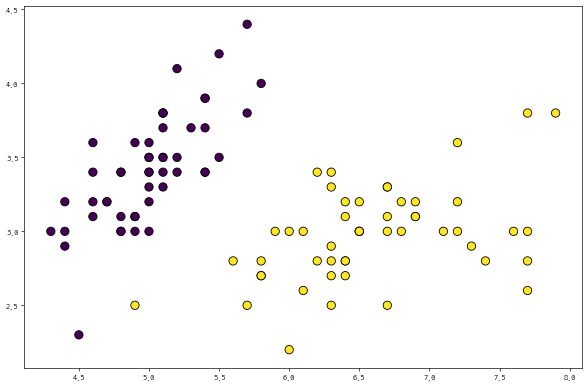

In [108]:
iris = datasets.load_iris()

# np.in1d 데이터를 지정된 데이터가 있다면 True 없으면 False로 리턴

idx = np.in1d(iris.target,[0,2])

# 0과 2의 0:2의 데이터 셋을 호출
x = iris.data[idx, 0:2]
y = iris.target[idx]

plt.figure(figsize=(12,8), dpi=60)
plt.scatter(x[:,0],x[:,1],c=y,s=100, edgecolors='k')
plt.show()

In [136]:
from sklearn.linear_model import Perceptron
import seaborn as sns
import matplotlib as mpl

def plot_preceptron(n):
    plt.figure(figsize=(12,8), dpi=80)
    model = Perceptron(max_iter=n, random_state=1).fit(x,y)
    xx_min = x[:,0].min() -1;
    xx_max = x[:,0].max() + 1;
    yy_min = x[:,1].min() -1;
    yy_max = x[:,1].max() + 1;
    xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 1000),np.linspace(yy_min, yy_max, 1000))
    
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette('Set2'))
    plt.contourf(xx,yy,zz,cmap=cmap)
    plt.scatter(x[:,0],x[:,1], s=50,linewidths=2,edgecolors='k',c=y,cmap=cmap)
    plt.xlim(xx_min, xx_max)
    plt.ylim(yy_min, yy_max)
    plt.grid(False)
    plt.show()

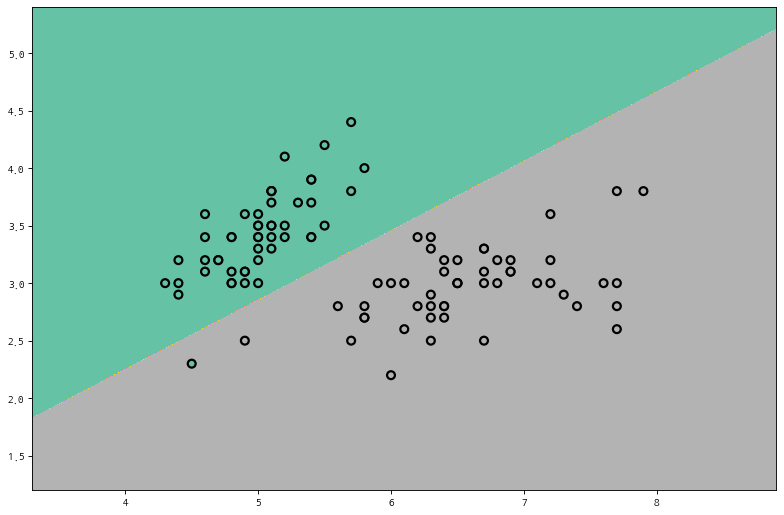

In [140]:
plot_preceptron()